# Salary Prediction

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [97]:
df = pd.read_csv(r'H:\Sandeep\DATA SCIENCE\MY Files\Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [99]:
X = df.iloc[:,0:2].values  #features
y = df.iloc[:,2].values    # Target variable

In [100]:
X

array([['Business Analyst', 1],
       ['Junior Consultant', 2],
       ['Senior Consultant', 3],
       ['Manager', 4],
       ['Country Manager', 5],
       ['Region Manager', 6],
       ['Partner', 7],
       ['Senior Partner', 8],
       ['C-level', 9],
       ['CEO', 10]], dtype=object)

In [103]:
# Check for and handle categorical variables
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
 
label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1)
x

,0,1,Position
0,1,45000,0
1,2,50000,4
2,3,60000,8
3,4,80000,5
4,5,110000,3
5,6,150000,7
6,7,200000,6
7,8,300000,9
8,9,500000,1
9,10,1000000,2


In [128]:
X=x.drop(1,axis=1)
y=x.iloc[:,1].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [129]:
X

,0,Position
0,1,0
1,2,4
2,3,8
3,4,5
4,5,3
5,6,7
6,7,6
7,8,9
8,9,1
9,10,2


In [124]:
len(X)
X.size

20

In [125]:
len(y)
y.size

10

In [115]:
RFRegressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
RFRegressor.fit(X,y)

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [116]:
from sklearn.metrics import mean_squared_error, r2_score
oob_score = RFRegressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

Out-of-Bag Score: 0.29136615880800076


In [117]:
predictions = RFRegressor.predict(X)
predictions

array([141000.,  49000.,  97000.,  71000., 193000., 136000., 191000.,
       305000., 530000., 850000.])

In [118]:
# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4125800000.0


In [119]:
# Evaluating the model
r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

R-squared: 0.9488509184903718


In [127]:
X

array([[ 1,  0],
       [ 2,  4],
       [ 3,  8],
       [ 4,  5],
       [ 5,  3],
       [ 6,  7],
       [ 7,  6],
       [ 8,  9],
       [ 9,  1],
       [10,  2]], dtype=int64)

In [137]:
X[0]

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: 0, dtype: int64

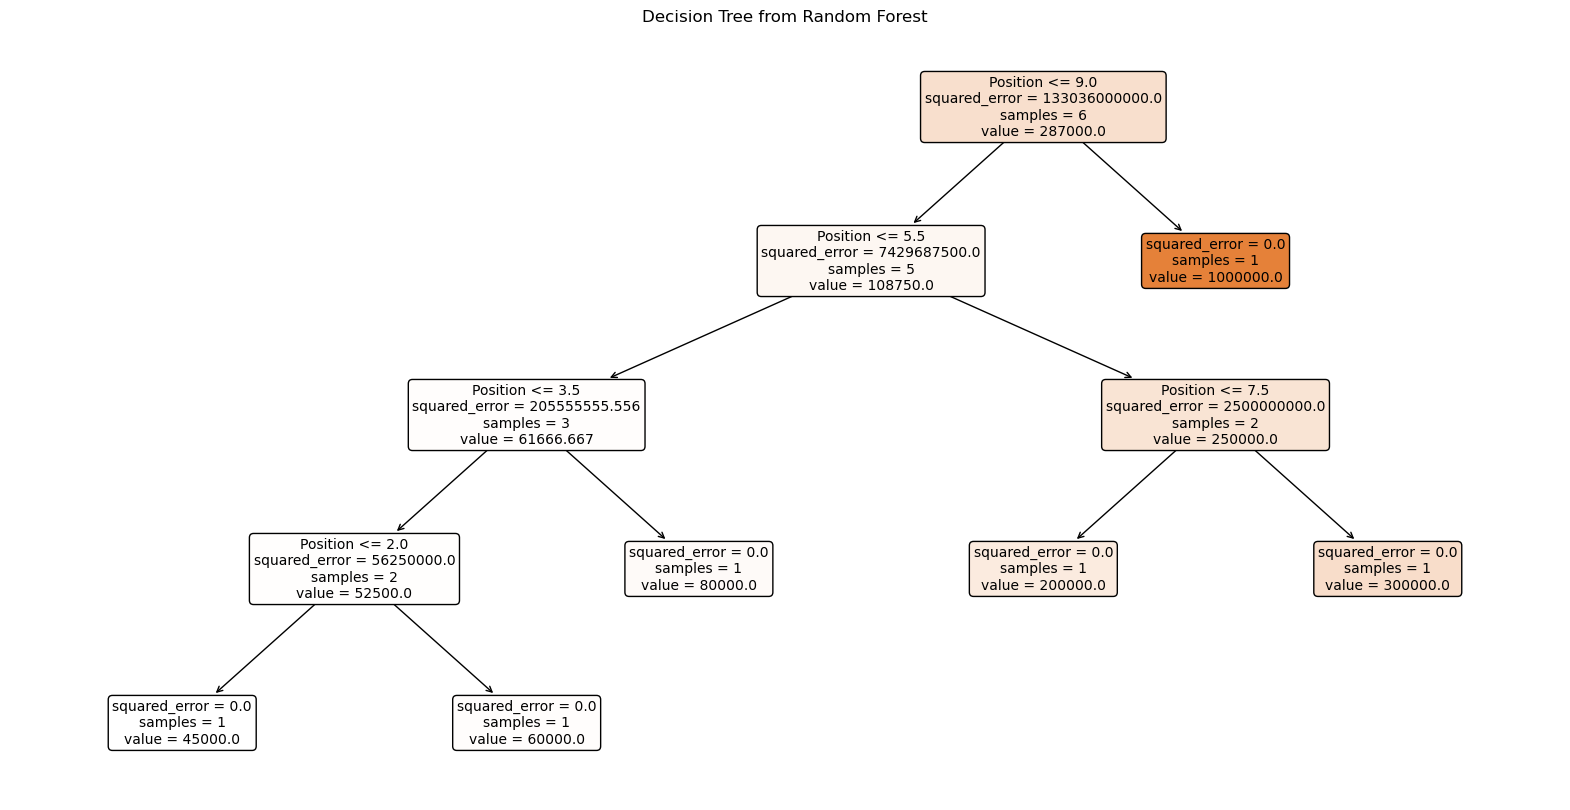

In [123]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
 
# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = RFRegressor.estimators_[0]
 
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

# Conclusion-
Random Forest Regression has become a powerful tool for continuous prediction tasks, with advantages over traditional decision trees. Its capability to handle high-dimensional data, capture complex relationships, and reduce overfitting has made it a popular choice for a variety of applications. Python’s scikit-learn library enables the implementation, optimization, and evaluation of Random Forest Regression models, making it an accessible and effective technique for machine learning practitioners.

# Gold Price Prediction

In [138]:
# libraries for handling data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier libraries

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [141]:
gld_df=pd.read_csv(r"H:\Sandeep\DATA SCIENCE\MY Files\gld_price_data.csv")
gld_df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [142]:
rows, columns = gld_df.shape

print(f"The Number Of Rows : {rows}")
print(f"The Number Of Columns : {columns}")

The Number Of Rows : 2290
The Number Of Columns : 6


In [153]:
gld_df.sample(1).iloc[0]

Date        2/18/2011
SPX        1343.01001
GLD        135.410004
USO         36.360001
SLV         31.790001
EUR/USD      1.362602
Name: 688, dtype: object

In [162]:
gld_df.Date.unique

<bound method Series.unique of 0        1/2/2008
1        1/3/2008
2        1/4/2008
3        1/7/2008
4        1/8/2008
          ...    
2285     5/8/2018
2286     5/9/2018
2287    5/10/2018
2288    5/14/2018
2289    5/16/2018
Name: Date, Length: 2290, dtype: object>

In [154]:
gld_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [155]:
gld_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [157]:
gld_df.isnull().sum()

Date       False
SPX        False
GLD        False
USO        False
SLV        False
EUR/USD    False
dtype: bool

In [158]:
# Checking for Duplicates

duplicated_values = gld_df[gld_df.duplicated]
duplicated_values

,Date,SPX,GLD,USO,SLV,EUR/USD


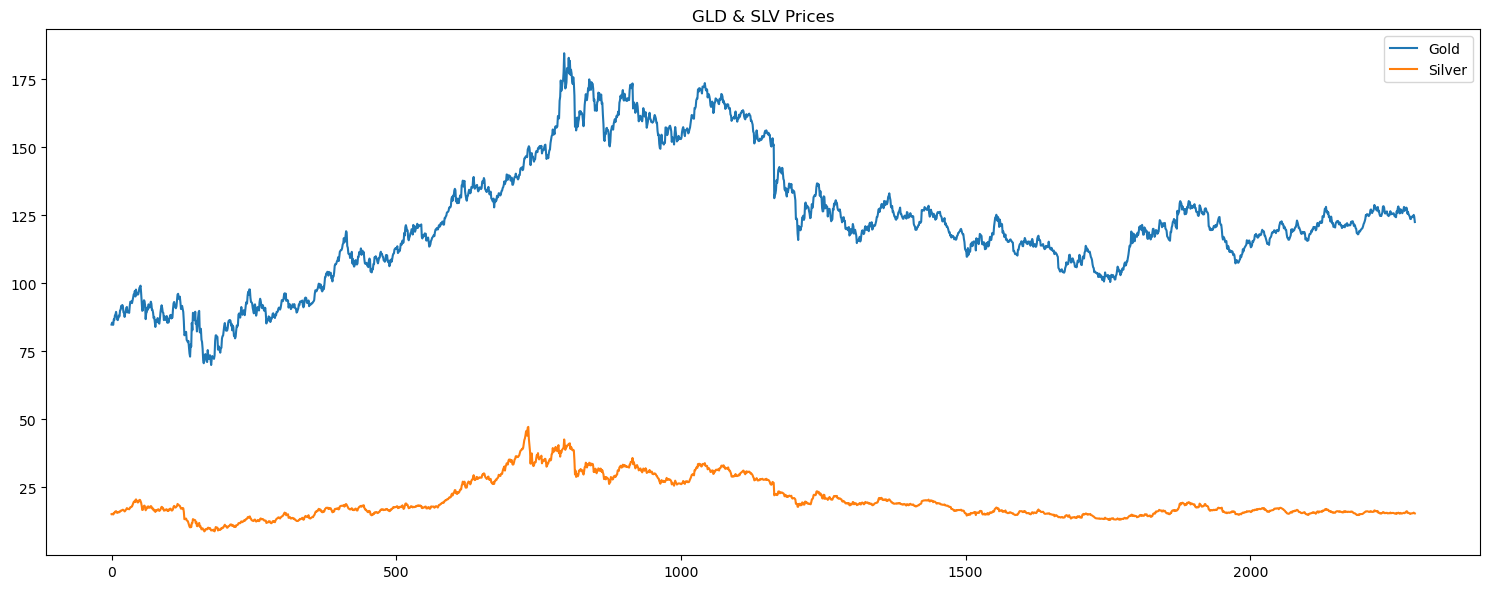

In [159]:
plt.figure(figsize=(15, 6))
gld_df['GLD'].plot()
gld_df['SLV'].plot()
plt.xlabel(None)
plt.ylabel(None)
plt.title("GLD & SLV Prices")
plt.legend(['Gold', 'Silver'])
plt.tight_layout()
plt.show()


<Axes: xlabel='GLD', ylabel='Density'>

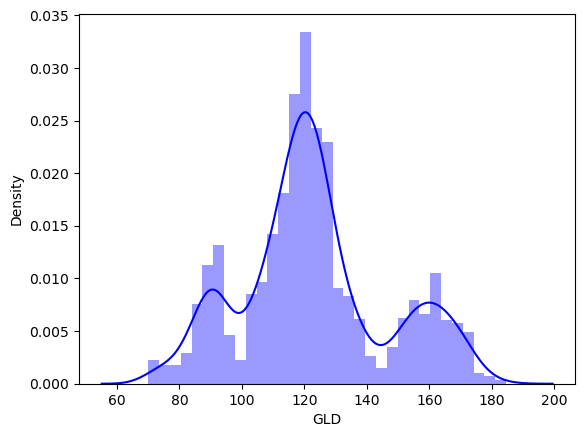

In [163]:
sns.distplot(gld_df['GLD'], color='blue', kde=True)


<Axes: >

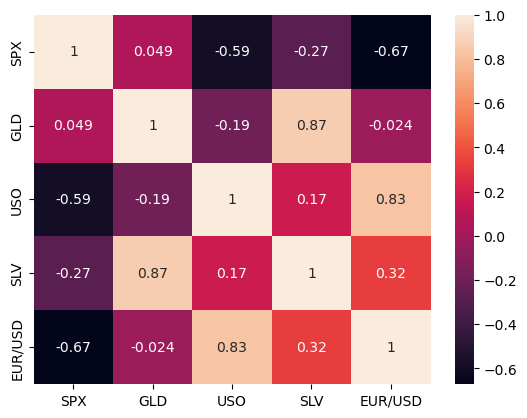

In [179]:
x = gld_df.drop(['Date'], axis=1)

correlation = x.corr()
sns.heatmap(correlation,cbar=True,annot=True)

In [164]:
X = gld_df.drop(['Date', 'GLD'], axis=1)
y = gld_df['GLD']

In [165]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
x_train.shape

(1832, 4)

In [167]:
x_test.shape

(458, 4)

In [168]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [169]:
test_prediction = model.predict(x_test)
test_prediction

array([122.43609955, 130.52180274, 127.68599969,  96.66949754,
       118.82660051, 114.45689922, 124.85760145, 117.7161992 ,
       108.13880113,  98.37689973,  95.62970006, 167.81559847,
       148.91780204, 116.31780083, 170.45260136,  85.13759985,
       123.10079878, 109.008197  , 113.00460061, 131.81110266,
       124.21609918, 113.55390106, 115.91630038, 108.73259938,
       108.63990096, 125.77899902, 118.72559935, 112.46259931,
       113.42170142, 125.87489907, 146.26820149,  89.58600023,
       167.98770004, 113.72209942, 108.31680113, 120.24190108,
       141.63199879, 161.32140114, 173.70509881, 152.8782012 ,
       119.14430124, 113.96010016, 121.33019943, 113.58699907,
       121.98490025, 107.96280079,  88.47279898, 114.44839936,
       129.96810269, 118.07910129, 103.5229007 , 130.08820255,
       107.30159821, 160.56570412, 131.65530081, 118.27259969,
       147.18760019, 133.35820268,  95.79670125, 124.60720151,
       115.03479848,  85.99760104, 104.27559928, 113.84

In [170]:
# r_squared error

score = metrics.r2_score(y_test, test_prediction)
print(f"The Value of R Squared error : {score}")

The Value of R Squared error : 0.9903060934125155


In [171]:
# mean squared error

mse = metrics.mean_squared_error(test_prediction, y_test)
print(f"The Value of Mean Squared Error : {mse}")

The Value of Mean Squared Error : 5.315167970511041


In [175]:
y_test = list(y_test)
y_test

[122.32,
 129.899994,
 126.980003,
 96.5,
 117.580002,
 115.0,
 125.440002,
 116.93,
 108.220001,
 98.830002,
 96.910004,
 168.789993,
 151.029999,
 115.839996,
 169.809998,
 85.129997,
 122.639999,
 107.849998,
 110.449997,
 131.240005,
 124.940002,
 115.379997,
 116.650002,
 109.25,
 110.529999,
 125.720001,
 123.709999,
 114.949997,
 114.290001,
 126.860001,
 146.869995,
 89.440002,
 167.270004,
 115.050003,
 117.110001,
 120.620003,
 141.630005,
 160.649994,
 173.309998,
 152.300003,
 117.459999,
 113.150002,
 121.309998,
 113.470001,
 121.349998,
 107.519997,
 88.839996,
 114.440002,
 130.559998,
 117.739998,
 99.669998,
 129.770004,
 106.169998,
 161.070007,
 127.93,
 115.940002,
 143.470001,
 130.110001,
 95.730003,
 124.360001,
 116.620003,
 85.599998,
 104.099998,
 112.610001,
 86.519997,
 122.400002,
 116.470001,
 112.660004,
 166.399994,
 91.989998,
 80.809998,
 160.559998,
 157.639999,
 103.419998,
 135.020004,
 110.400002,
 124.43,
 127.739998,
 112.440002,
 119.910004,
 1

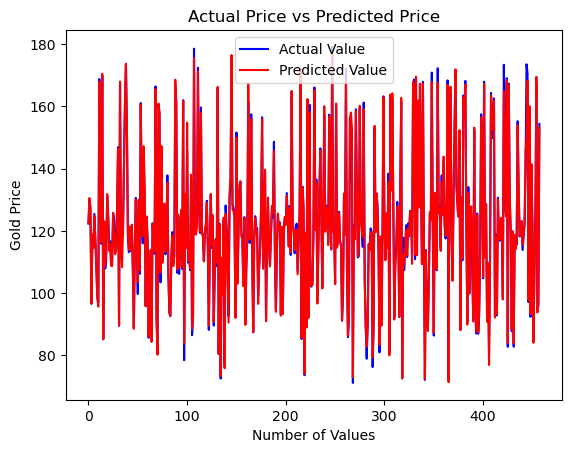

In [176]:
plt.plot(y_test, color='blue', label='Actual Value')
plt.plot(test_prediction, color='red', label='Predicted Value')
plt.title("Actual Price vs Predicted Price")
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

# Conclusion : 
As you saw in this project, we first train a machine learning model, then use the trained model for prediction. Similarly, any model can be made much more precise, by feeding a very large dataset, to get a very accurate score (but it will be pretty time-consuming). For a beginner, I feel the dataset that I had used was pretty decent.